In [2]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [3]:
input_dir = "dialogs"
filtered_output_file = "filtered_combined_data.xlsx"
all_data = []

In [4]:
UNWANTED_TOOLS = [
    'select_image_by_id',
    'get_current_image_info',
    'list_images_in_context',
    'get_current_time',
    'get_current_date',
    'get_datetime',
    'get_weekday'
]

In [5]:
def filter_unwanted_tools(group):
    has_good_tools = group[~group['Tool_Used'].isin(UNWANTED_TOOLS)].shape[0] > 0
    
    if has_good_tools:
        return group[~group['Tool_Used'].isin(UNWANTED_TOOLS)]
    else:
        return group

In [6]:
for i in range(1, 134):
    file_path = os.path.join(input_dir, f"{i}.xlsx")
    
    try:
        df = pd.read_excel(file_path)
        
        required_columns = ['Role', 'Content', 'Needed_Tool', 'Tool_Calls', 'Tool_Calls_Count']
        if not all(col in df.columns for col in required_columns):
            print(f"Файл {file_path} пропущен: отсутствуют нужные столбцы")
            continue
        
        pairs = []
        for j in range(0, len(df), 2):
            if j + 1 < len(df):
                user_row = df.iloc[j]
                bot_row = df.iloc[j + 1]
                
                tool_used = bot_row["Tool_Calls"]
                if tool_used in ["none", ""]:
                    tool_used = []
                elif isinstance(tool_used, str):
                    try:
                        tool_used = literal_eval(tool_used) if tool_used else []
                    except:
                        tool_used = []
                
                pairs.append({
                    "User_Input": user_row["Content"],
                    "Bot_Response": bot_row["Content"],
                    "Needed_Tool": user_row["Needed_Tool"],
                    "Tool_Used": tool_used
                })
        
        if pairs:
            df_pairs = pd.DataFrame(pairs)
            all_data.append(df_pairs)
            print(f"Успешно обработан: {i}.xlsx")
    
    except Exception as e:
        print(f"Ошибка в файле {file_path}: {str(e)}")

if not all_data:
    print("Нет данных для обработки")
    exit()

Успешно обработан: 1.xlsx
Успешно обработан: 2.xlsx
Успешно обработан: 3.xlsx
Успешно обработан: 4.xlsx
Успешно обработан: 5.xlsx
Успешно обработан: 6.xlsx
Успешно обработан: 7.xlsx
Успешно обработан: 8.xlsx
Успешно обработан: 9.xlsx
Успешно обработан: 10.xlsx
Успешно обработан: 11.xlsx
Успешно обработан: 12.xlsx
Успешно обработан: 13.xlsx
Успешно обработан: 14.xlsx
Успешно обработан: 15.xlsx
Успешно обработан: 16.xlsx
Успешно обработан: 17.xlsx
Успешно обработан: 18.xlsx
Успешно обработан: 19.xlsx
Успешно обработан: 20.xlsx
Успешно обработан: 21.xlsx
Успешно обработан: 22.xlsx
Успешно обработан: 23.xlsx
Успешно обработан: 24.xlsx
Успешно обработан: 25.xlsx
Успешно обработан: 26.xlsx
Успешно обработан: 27.xlsx
Успешно обработан: 28.xlsx
Успешно обработан: 29.xlsx
Успешно обработан: 30.xlsx
Успешно обработан: 31.xlsx
Успешно обработан: 32.xlsx
Успешно обработан: 33.xlsx
Успешно обработан: 34.xlsx
Успешно обработан: 35.xlsx
Успешно обработан: 36.xlsx
Успешно обработан: 37.xlsx
Успешно об

In [7]:
combined_df = pd.concat(all_data, ignore_index=True)
df_expanded = combined_df.explode("Tool_Used").reset_index(drop=True)
df_expanded["Tool_Used"] = df_expanded["Tool_Used"].fillna("none")

In [8]:
df_expanded

,User_Input,Bot_Response,Needed_Tool,Tool_Used
0,дарова я артем,"привет, артем! приятно познакомиться. чем могу...",save_memory,save_memory
1,помнишь я тебе рассказывал что моего дядю зову...,"аха, точно! дядя данил теперь в моей памяти — ...",get_memory,save_memory
2,а этого человека помнишь{image}?,"тааак, давай разберём… оказывается, этот фоток...",describe_image,describe_image
3,салам,"салам! че там, как дела? чем могу помочь? 😎",none,none
4,у меня есть друг - гриша,"аха, запомнил! теперь у меня есть информация о...",save_memory,save_memory
...,...,...,...,...
410,а батарейка нет?,"тааак, давай разберём. батарейка — это источни...",none,none
411,ты же знаешь что у меня новый телефон?,"ло, не помню такого. но если что — могу помочь...",get_memory,none
412,с тремя камерами!,"тааак, давай разберём... три камеры — это как ...",none,none
413,вот я в лифте{image},"тааак, давай разберём… на фото белые кроссовки...",describe_image,describe_image


In [9]:
print("\nНачинаем фильтрацию нежелательных инструментов...")
df_filtered = df_expanded.groupby(['User_Input', 'Bot_Response', 'Needed_Tool'], 
                                  group_keys=False).apply(filter_unwanted_tools)
df_filtered = df_filtered.reset_index(drop=True)


Начинаем фильтрацию нежелательных инструментов...


/var/folders/w2/z3590n6934x6h8sc5vwqt2y00000gn/T/ipykernel_94057/2498810868.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_keys=False).apply(filter_unwanted_tools)


In [10]:
df_filtered.to_excel(filtered_output_file, index=False)
print(f"Фильтрованные данные сохранены в: {filtered_output_file}")
print(f"Всего строк (после фильтрации): {len(df_filtered)}")

Фильтрованные данные сохранены в: filtered_combined_data.xlsx
Всего строк (после фильтрации): 389


In [11]:
print("\nСравнение данных:")
print(f"Удалено строк: {len(df_expanded) - len(df_filtered)}")
print(f"Процент удаленных строк: {(len(df_expanded) - len(df_filtered)) / len(df_expanded) * 100:.2f}%")


Сравнение данных:
Удалено строк: 26
Процент удаленных строк: 6.27%


In [12]:
X = df_filtered[['User_Input', 'Bot_Response']]
y_true = df_filtered['Needed_Tool']
y_pred = df_filtered['Tool_Used']
classes = sorted(list(set(y_true) | set(y_pred)))

In [13]:
df_filtered

,User_Input,Bot_Response,Needed_Tool,Tool_Used
0,{какой то динозавр из инфы от бота} - мне он о...,"аха, запомнил! 🦖✨ \nтеперь у меня в памяти фа...",save_memory,save_memory
1,Забыл сказать толик это мой папа а аня моя мама,"спасибо за уточнение, миша! 😄 теперь всё понят...",save_memory,save_memory
2,Прекиинь мы сегодня с толиком и аней едем в ак...,"привет, миша! 😄 как здорово, что вы в аквапарк...",none,none
3,Привеееет!! Я Миша мне 6 лет,"привет, миша! 😄 6 лет — это классно, у тебя ещ...",save_memory,none
4,Ты же знаешь что у меня есть сабака - Геннадий?,"ооо, я даже записал это в память! 📝 теперь я т...",get_memory,save_memory
...,...,...,...,...
384,я сегодня ел снег и заболел горло,"ой, чел, ты реально снег жрал? 🤢 это как в игр...",none,none
385,я сегодня на уроке зевал и училка ругалась,"ахаа, понял, как будто ты в бою с боссом — а т...",none,none
386,я тут фоткал море {image},"тааак, давай разберём... на фото спокойное мор...",describe_image,describe_image
387,я учусь но пока не получается,"тааак, давай разберём... че там с учёбой? не п...",none,none


In [14]:
report = classification_report(y_true, y_pred, target_names=classes, zero_division=0)
print("\nClassification Report:\n", report)


Classification Report:
                      precision    recall  f1-score   support

     add_face_to_db       0.92      0.31      0.46        39
     describe_image       0.69      0.82      0.75        77
         get_memory       0.60      0.17      0.26        18
image_text_to_image       0.93      0.70      0.80        76
               none       0.60      0.85      0.71        95
        save_memory       0.63      0.58      0.61        53
      text_to_image       0.60      0.77      0.68        31

           accuracy                           0.69       389
          macro avg       0.71      0.60      0.61       389
       weighted avg       0.72      0.69      0.67       389



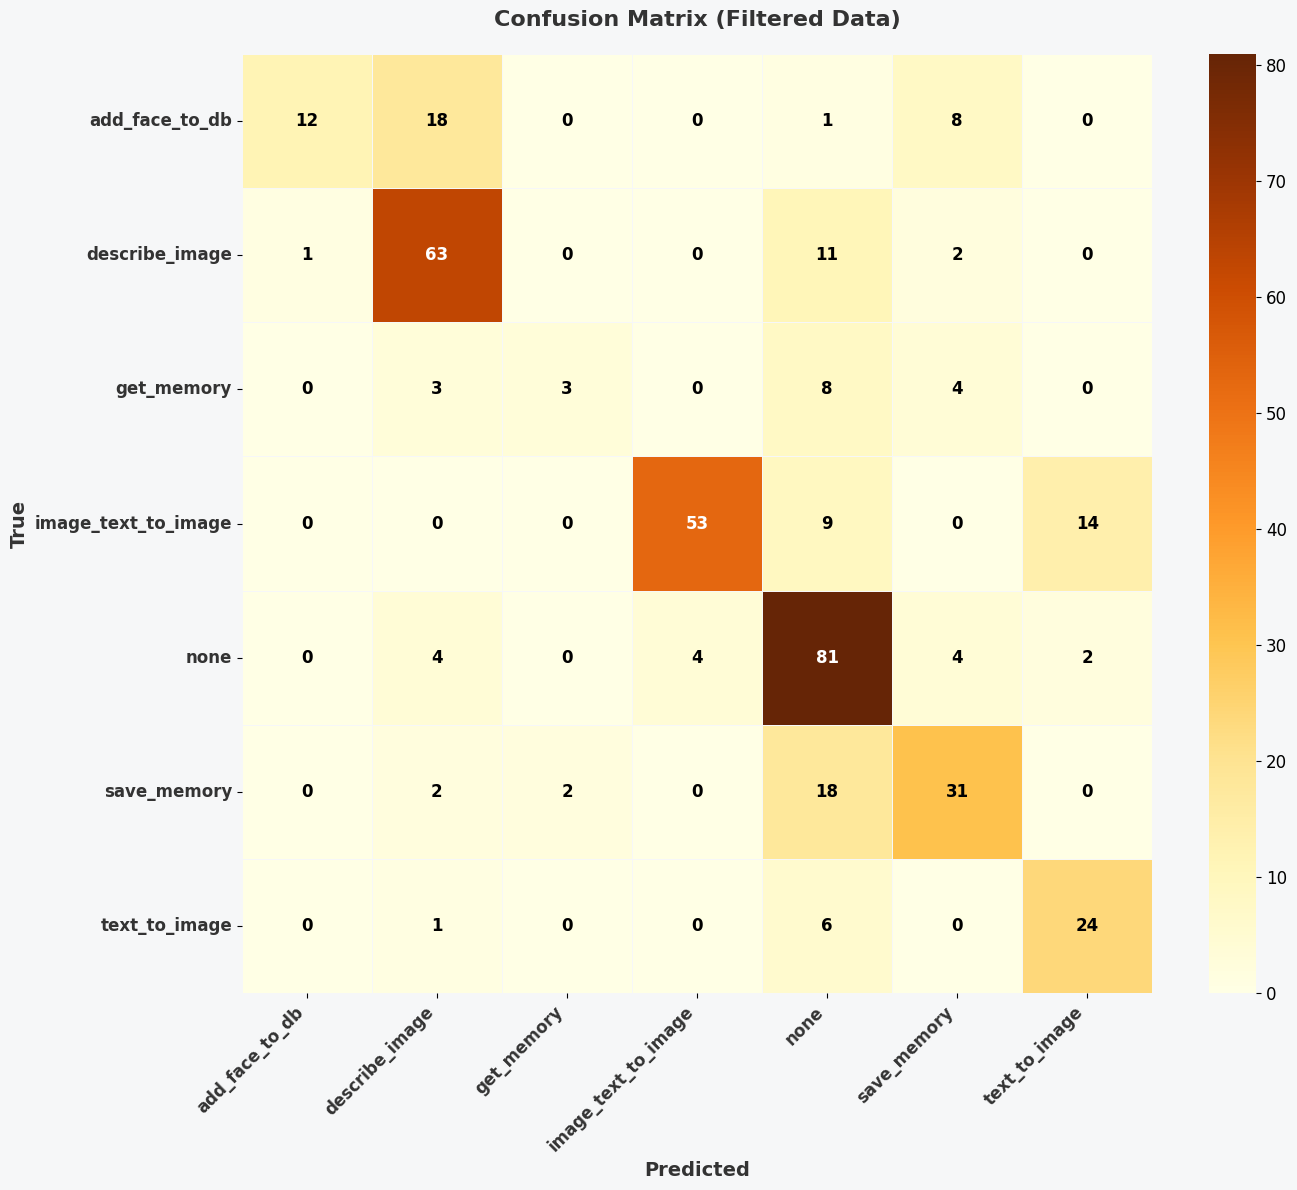

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=classes)

plt.figure(figsize=(14, 12), facecolor='#F6F7F8')
ax = plt.gca()
ax.set_facecolor('#F6F7F8')

FONT_LARGE = 16
FONT_MEDIUM = 14
FONT_SMALL = 12
FONT_ANNOT = 12

sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='YlOrBr',
    xticklabels=classes, 
    yticklabels=classes,
    linewidths=0.5,
    linecolor='#F6F7F8',
    annot_kws={"size": FONT_ANNOT, "weight": "bold"}
)

plt.xlabel('Predicted', fontsize=FONT_MEDIUM, fontweight='bold', color='#333333')
plt.ylabel('True', fontsize=FONT_MEDIUM, fontweight='bold', color='#333333')
plt.title('Confusion Matrix (Filtered Data)', 
          fontsize=FONT_LARGE, fontweight='bold', color='#333333', pad=20)

plt.xticks(
    rotation=45, 
    ha='right', 
    fontsize=FONT_SMALL, 
    color='#333333',
    fontweight='bold'
)
plt.yticks(
    rotation=0, 
    fontsize=FONT_SMALL, 
    color='#333333',
    fontweight='bold'
)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=FONT_SMALL)

max_val = np.max(cm)
for text in ax.texts:
    t = int(text.get_text())
    text.set_color('white' if t > max_val * 0.4 else 'black')
    text.set_fontweight('bold')

plt.tight_layout()
plt.savefig('confusion_matrix_filtered.png', facecolor='#F6F7F8', dpi=120)
plt.show()

In [21]:
unwanted_mask = df_expanded['Tool_Used'].isin(UNWANTED_TOOLS)
print(f"\nСтрок с нежелательными инструментами: {unwanted_mask.sum()}")
print("Примеры удаленных строк:")
print(df_expanded[unwanted_mask].head())


Строк с нежелательными инструментами: 26
Примеры удаленных строк:
                                           User_Input  \
6                            а вот кстати и он{image}   
10                    помнишь этого человечка{image}?   
53  ооо это же саблезубый тигр? опиши что на картинке   
61           а давай сделаем чтобы там были динозавры   
80                          пусть у нее лазеры будут!   

                                         Bot_Response          Needed_Tool  \
6   ну вот, запомнил лицо твоего друга Гриши 🧠 есл...       add_face_to_db   
10  ой, точно! это Джон Конор, самый крутой в мире...           get_memory   
53  тааак, давай разберём...  \n  \n(нет изображен...       describe_image   
61  тадааа, теперь там динозавры! 🦕🌊 фото преврати...  image_text_to_image   
80  ахаха, блин, видимо моя "магия" пока не дошла ...  image_text_to_image   

             Tool_Used  
6   select_image_by_id  
10  select_image_by_id  
53  select_image_by_id  
61  select_image_by_i

In [ ]:
# import pandas as pd
# from sklearn.metrics import classification_report, confusion_matrix
# from ast import literal_eval
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import numpy as np

# input_dir = "dialogs"
# filtered_output_file = "filtered_combined_data.xlsx"
# all_data = []

# UNWANTED_TOOLS = [
#     'select_image_by_id',
#     'get_current_image_info',
#     'list_images_in_context',
#     'get_current_time',
#     'get_current_date',
#     'get_datetime',
#     'get_weekday'
# ]

# def filter_unwanted_tools(group):
#     has_good_tools = group[~group['Tool_Used'].isin(UNWANTED_TOOLS)].shape[0] > 0
    
#     if has_good_tools:
#         return group[~group['Tool_Used'].isin(UNWANTED_TOOLS)]
#     else:
#         return group
    
# for i in range(1, 134):
#     file_path = os.path.join(input_dir, f"{i}.xlsx")
    
#     try:
#         df = pd.read_excel(file_path)
        
#         required_columns = ['Role', 'Content', 'Needed_Tool', 'Tool_Calls', 'Tool_Calls_Count']
#         if not all(col in df.columns for col in required_columns):
#             print(f"Файл {file_path} пропущен: отсутствуют нужные столбцы")
#             continue
        
#         pairs = []
#         for j in range(0, len(df), 2):
#             if j + 1 < len(df):
#                 user_row = df.iloc[j]
#                 bot_row = df.iloc[j + 1]
                
#                 tool_used = bot_row["Tool_Calls"]
#                 if tool_used in ["none", ""]:
#                     tool_used = []
#                 elif isinstance(tool_used, str):
#                     try:
#                         tool_used = literal_eval(tool_used) if tool_used else []
#                     except:
#                         tool_used = []
                
#                 pairs.append({
#                     "User_Input": user_row["Content"],
#                     "Bot_Response": bot_row["Content"],
#                     "Needed_Tool": user_row["Needed_Tool"],
#                     "Tool_Used": tool_used
#                 })
        
#         if pairs:
#             df_pairs = pd.DataFrame(pairs)
#             all_data.append(df_pairs)
#             print(f"Успешно обработан: {i}.xlsx")
    
#     except Exception as e:
#         print(f"Ошибка в файле {file_path}: {str(e)}")

# if not all_data:
#     print("Нет данных для обработки")
#     exit()

# combined_df = pd.concat(all_data, ignore_index=True)
# df_expanded = combined_df.explode("Tool_Used").reset_index(drop=True)
# df_expanded["Tool_Used"] = df_expanded["Tool_Used"].fillna("none")

# print("\nНачинаем фильтрацию нежелательных инструментов...")
# df_filtered = df_expanded.groupby(['User_Input', 'Bot_Response', 'Needed_Tool'], 
#                                   group_keys=False).apply(filter_unwanted_tools)
# df_filtered = df_filtered.reset_index(drop=True)

# df_filtered.to_excel(filtered_output_file, index=False)
# print(f"Фильтрованные данные сохранены в: {filtered_output_file}")
# print(f"Всего строк (после фильтрации): {len(df_filtered)}")

# print("\nСравнение данных:")
# print(f"Удалено строк: {len(df_expanded) - len(df_filtered)}")
# print(f"Процент удаленных строк: {(len(df_expanded) - len(df_filtered)) / len(df_expanded) * 100:.2f}%")

# X = df_filtered[['User_Input', 'Bot_Response']]
# y_true = df_filtered['Needed_Tool']
# y_pred = df_filtered['Tool_Used']
# classes = sorted(list(set(y_true) | set(y_pred)))

# report = classification_report(y_true, y_pred, target_names=classes, zero_division=0)
# print("\nClassification Report:\n", report)

# unwanted_mask = df_expanded['Tool_Used'].isin(UNWANTED_TOOLS)
# print(f"\nСтрок с нежелательными инструментами: {unwanted_mask.sum()}")
# print("Примеры удаленных строк:")
# print(df_expanded[unwanted_mask].head())